In [1]:
import os
import numpy as np
import tensorflow as tf
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<ipython-input-1-414408b93e2c>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [2]:
import os
os.environ['KAGGLE USERNAME']="nadiasharaz"
os.environ['KAGGLE KEY']="500d9ab35f406405fd207c19240587b7"

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

100% 662M/663M [00:34<00:00, 21.2MB/s]
100% 663M/663M [00:34<00:00, 19.9MB/s]


In [6]:
!unzip tuberculosis-tb-chest-xray-dataset.zip


Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [7]:
!pip install mplcyberpunk
!pip install split-folders
import pathlib, os, random, mplcyberpunk
import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf


In [8]:
base_path = r'/content/TB_Chest_Radiography_Database'
base_path = pathlib.Path(base_path)
base_path

PosixPath('/content/TB_Chest_Radiography_Database')

In [9]:
splitfolders.ratio(base_path, output='X_ray_Imgs', seed=123, ratio=(0.5, 0.5),
                  group_prefix=None)

Copying files: 4200 files [00:05, 835.95 files/s] 


In [10]:
NormalImgs = [fn for fn in os.listdir('/content/TB_Chest_Radiography_Database/Normal') if fn.endswith('.png')]
TuberculosisImgs = [fn for fn in os.listdir('/content/TB_Chest_Radiography_Database/Tuberculosis') if fn.endswith('.png')]


In [11]:
len(NormalImgs)

3500

In [12]:
len(TuberculosisImgs)

700

In [13]:
pip install git+https://github.com/keras-team/keras-preprocessing.git

  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-n0ujb63k
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-n0ujb63k
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-py3-none-any.whl size=43610 sha256=647bb4faeb5b6f1c29a406913f670fbf85dd0d90f28723eeb7effb9630b6308b
  Stored in directory: /tmp/pip-ephem-wheel-cache-nxq3q6md/wheels/72/0b/c7/3f6b26f2d789c712867e02502e1f1b740091f8615f32a9f870
Successfully built Keras-Preprocessing


In [14]:
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model,Sequential
#from tensorflow.keras.applications.vgg19 import VGG19
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import RegNetX002
from tensorflow.keras.applications import regnet
reg = RegNetX002(weights="imagenet",include_top = False,input_shape=(224,224,3))

9797576/9797576 [==============================] - 1s 0us/step


In [15]:
import tensorflow.compat.v2 as tf

from keras import backend
from keras import layers
from keras.applications import imagenet_utils
from keras.engine import training
from keras.utils import data_utils
from keras.utils import layer_utils

# isort: off
from tensorflow.python.util.tf_export import keras_export

BASE_WEIGHTS_PATH = (

    "https://storage.googleapis.com/tensorflow/keras-applications/regnet/"
)

WEIGHTS_HASHES = {
    "x002": (
        "49fb46e56cde07fdaf57bffd851461a86548f6a3a4baef234dd37290b826c0b8",
        "5445b66cd50445eb7ecab094c1e78d4d3d29375439d1a7798861c4af15ffff21",
    ),
}

In [16]:

MODEL_CONFIGS = {
    "x002": {
        "depths": [1, 1, 4, 7],
        "widths": [24, 56, 152, 368],
        "group_width": 8,
        "default_size": 224,
        "block_type": "X",
    },
}

In [17]:
@keras_export(
    "keras.applications.regnet.RegNetX002", "keras.applications.RegNetX002"
)
def RegNetX002(
    model_name="regnetx002",
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
):
    return RegNet(
        MODEL_CONFIGS["x002"]["depths"],
        MODEL_CONFIGS["x002"]["widths"],
        MODEL_CONFIGS["x002"]["group_width"],
        MODEL_CONFIGS["x002"]["block_type"],
        MODEL_CONFIGS["x002"]["default_size"],
        model_name=model_name,
        include_top=include_top,
        include_preprocessing=include_preprocessing,
        weights=weights,
        input_tensor=input_tensor,
        input_shape=input_shape,
        pooling=pooling,
        classes=classes,
        classifier_activation=classifier_activation,
    )

In [18]:

# # Create RegNetX002 model
# base_model = regnet.RegNetX002(
#     include_top=False,
#     weights='imagenet',
#     input_shape=(224, 224, 3)
# )
# num_classes=2
# # Add a new classifier on top
# x = base_model.output
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(256, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# # Freeze the base model's layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()
# # Train the model
# # epochs = 10
# # steps_per_epoch = train_generator.n // batch_size
# # validation_steps = val_generator.n // batch_size
# # history= model.fit(
#     train_generator,
#     steps_per_epoch=steps_per_epoch,
#     epochs=epochs,
#     validation_data=val_generator,
#     validation_steps=validation_steps
# )

In [19]:
for layer in reg.layers:
  layer.trainable = False

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(reg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnetx002 (Functional)     (None, 7, 7, 368)         2336640   
                                                                 
 flatten (Flatten)           (None, 18032)             0         
                                                                 
 dense (Dense)               (None, 1)                 18033     
                                                                 
Total params: 2,354,673
Trainable params: 18,033
Non-trainable params: 2,336,640
_________________________________________________________________


In [28]:
# Create a dataset
images = NormalImgs + TuberculosisImgs
labels = [0] * len(NormalImgs) + [1] * len(TuberculosisImgs)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
#class_weights = dict(zip(np.unique(train_classes), class_weights))
#class_weights
#class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [30]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)
train_data = train_datagen.flow_from_directory(base_path,
                                              target_size= (224, 224),
                                              class_mode= "binary",
                                              batch_size=20,
                                              subset= "training"
                                              )
# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)
val_data= val_datagen.flow_from_directory(base_path,
                                              target_size= (224, 224),
                                              class_mode= "binary",
                                              batch_size=20,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 3360 images belonging to 2 classes.

validation data :
Found 840 images belonging to 2 classes.


In [31]:
# Number of train and validation steps
train_steps=train_data.n//train_data.batch_size
validation_steps=val_data.n//val_data.batch_size

In [32]:
# from keras_preprocessing.image import ImageDataGenerator
# #Train the model
# epochs = 10
# batch_size=20
# steps_per_epoch = train_datagen.n // batch_size
# validation_steps = val_datagen.n // batch_size
# history= model.fit(
#     train_datagen,
#     steps_per_epoch=steps_per_epoch,
#     epochs=epochs,
#     validation_data=val_datagen,
#     validation_steps=validation_steps
# )

In [33]:
# Train the model
num_epoch=10
history = model.fit(train_data,
                    steps_per_epoch=train_steps,
                    validation_data=val_data,
                    validation_steps=validation_steps,
                    epochs=num_epoch,
                    verbose=2,
                    class_weight=class_weights_dict)

Epoch 1/10
168/168 - 88s - loss: 0.7812 - accuracy: 0.5583 - val_loss: 0.8995 - val_accuracy: 0.3512 - 88s/epoch - 525ms/step
Epoch 2/10
168/168 - 84s - loss: 0.7807 - accuracy: 0.5667 - val_loss: 0.7378 - val_accuracy: 0.5464 - 84s/epoch - 500ms/step
Epoch 3/10
168/168 - 86s - loss: 0.7656 - accuracy: 0.5723 - val_loss: 1.2037 - val_accuracy: 0.2357 - 86s/epoch - 512ms/step
Epoch 4/10
168/168 - 83s - loss: 0.7597 - accuracy: 0.5842 - val_loss: 0.3943 - val_accuracy: 0.8357 - 83s/epoch - 496ms/step
Epoch 5/10
168/168 - 84s - loss: 0.7202 - accuracy: 0.6042 - val_loss: 0.5612 - val_accuracy: 0.7500 - 84s/epoch - 501ms/step
Epoch 6/10
168/168 - 82s - loss: 0.7605 - accuracy: 0.5932 - val_loss: 0.3949 - val_accuracy: 0.8369 - 82s/epoch - 490ms/step
Epoch 7/10
168/168 - 84s - loss: 0.7059 - accuracy: 0.6021 - val_loss: 0.6156 - val_accuracy: 0.6690 - 84s/epoch - 500ms/step
Epoch 8/10
168/168 - 83s - loss: 0.7769 - accuracy: 0.5613 - val_loss: 0.3974 - val_accuracy: 0.8464 - 83s/epoch - 493

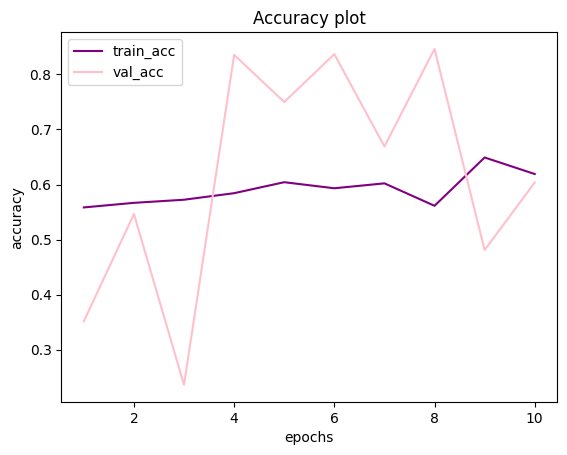

In [34]:
epochs= range(1, len(history.history["accuracy"])+1)
plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

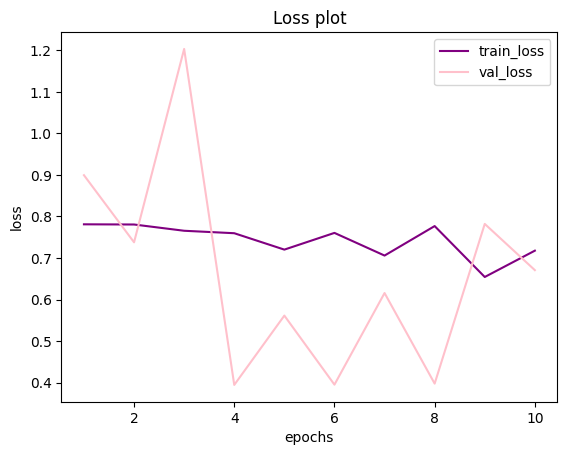

In [35]:
plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [36]:
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
prediction

42/42 [==============================] - 10s 212ms/step


array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [

In [37]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

0.6035714285714285
              precision    recall  f1-score   support

           0       0.93      0.57      0.70       700
           1       0.27      0.79      0.40       140

    accuracy                           0.60       840
   macro avg       0.60      0.68      0.55       840
weighted avg       0.82      0.60      0.65       840



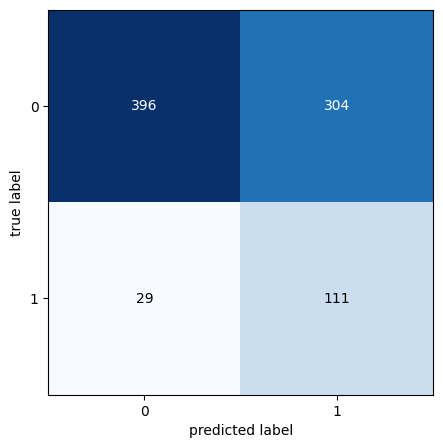

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
cm= confusion_matrix(val_data.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))
print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

In [39]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(val_data.classes, prediction)
# Assigning columns names
cm_df = pd.DataFrame(cm,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,396,304
Actual Positive,29,111


In [40]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')


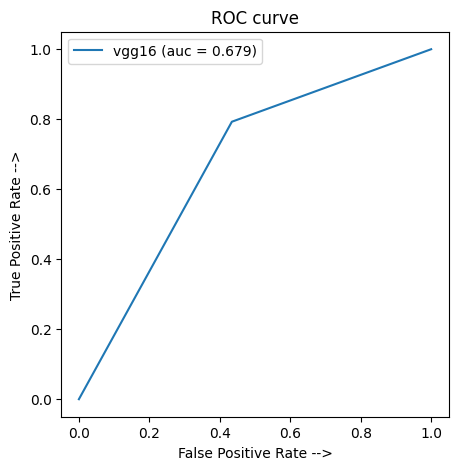

In [41]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(val_data.classes, prediction)
auc_Xception = auc(fpr, tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='vgg16 (auc = %0.3f)' % auc_Xception)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.title("ROC curve")
plt.show()


In [42]:
li=list(val_data.class_indices)
li

['Normal', 'Tuberculosis']

Following is our prediction:
1/1 [==============================] - 3s 3s/step
(1, 1)
[[0.14779012]]


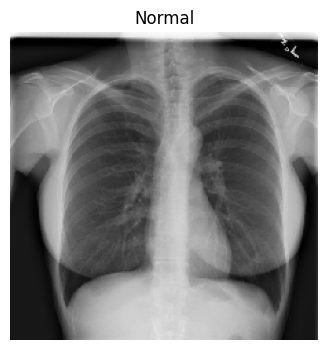

In [43]:
# predicting an image
from keras.preprocessing import image
import numpy as np
from keras.applications import imagenet_utils
image_path = "/content/TB_Chest_Radiography_Database/Normal/Normal-1000.png"
new_img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img = tf.keras.utils.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255
print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print((prediction.shape))
print(prediction)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
#Another way
# img_class = model.predict_classes(img)
# img_prob = model.predict_proba(img)
# print(img_class ,img_prob )
#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [44]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [45]:
import gradio as gr
import numpy as np
class_names=['Normal','Tuberculosis']
def predict_image(img1):
  img1=img1.reshape(224,224,-1)
  img1 = tf.keras.utils.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  img1 = img1/255
  prediction=model.predict(img1)
  print(prediction)
  m=prediction.flatten()
  if m<0.5:
    d=1-prediction[0]
    print("Normal")
    prediction=np.insert(prediction,0,d)
#     prediction.insert(1,d)

  else:
    d=1-prediction[0]
#     prediction.insert(0,d)
    print("TB")
    prediction=np.insert(prediction,0,d)
  print(prediction)
  for i in range(2):
    print(class_names[i],float(prediction[i]))

  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [46]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)
gr.Interface(fn=predict_image, inputs=image,title="Tuberculosis classification", outputs=label,interpretation='default').launch(debug='True')

<ipython-input-46-d31feb1c76ea>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(224,224))
<ipython-input-46-d31feb1c76ea>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(224,224))
<ipython-input-46-d31feb1c76ea>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=2)
<ipython-input-46-d31feb1c76ea>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=2)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 32ms/step
[[0.15207261]]
Normal
[0.8479274  0.15207261]
Normal 0.8479273915290833
Tuberculosis 0.15207260847091675
1/1 [==============================] - 0s 30ms/step
[[0.64677525]]
TB
[0.35322475 0.64677525]
Normal 0.3532247543334961
Tuberculosis 0.6467752456665039
1/1 [==============================] - 0s 28ms/step
[[0.9273535]]
TB
[0.0726465 0.9273535]
Normal 0.07264649868011475
Tuberculosis 0.9273535013198853
Keyboard interruption in main thread... closing server.
